In [266]:
# coding: shift_jis
# ライブラリ読み込み
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [267]:
# 日本語化
fontprop = matplotlib.font_manager.FontProperties(fname="C:\Windows\Fonts/ipaexg.ttf") # フォントファイルの場所を指定

In [268]:
# CSV読み込み
df  = pd.read_csv('./monthly_data.csv', encoding="shift-jis")

In [269]:
df.head()

,年月,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),最多風向(16方位),最高気温(℃),最低気温(℃),10分間降水量の最大(mm),最大風速(m/s),最大風速(風向),最大瞬間風速(m/s),最大瞬間風速(風向)
0,2008/7/1,25.6,8.5,202.6,2.9,南,34.8,16.7,NaN,11.0,南南西,NaN,NaN
1,2008/8/1,26.4,249.0,195.3,3.3,南南西,33.1,19.5,NaN,10.0,南南西,NaN,NaN
2,2008/9/1,23.9,234.5,149.4,2.8,北,31.4,15.4,NaN,12.0,南南西,NaN,NaN
3,2008/10/1,19.1,159.5,154.6,2.6,北北東,26.1,11.1,NaN,10.0,南南西,NaN,NaN
4,2008/11/1,13.0,63.0,141.7,3.0,北,22.9,2.7,NaN,10.0,南西,NaN,NaN


In [270]:
df.tail()

,年月,平均気温(℃),降水量の合計(mm),日照時間(時間),平均風速(m/s),最多風向(16方位),最高気温(℃),最低気温(℃),10分間降水量の最大(mm),最大風速(m/s),最大風速(風向),最大瞬間風速(m/s),最大瞬間風速(風向)
116,2018/3/1,11.8,205.5,194.9,3.6,北北東,21.4,1.1,14.0,14.5,南南西,20.9,南
117,2018/4/1,16.9,113.5,200.1,3.6,南南西,25.8,6.3,4.5,16.7,南南西,24.0,南南西
118,2018/5/1,19.5,168.5,203.3,3.5,南南西,28.5,9.1,7.5,14.2,南南西,19.2,南南西
119,2018/6/1,22.1,175.0,184.4,3.5,南南西,28.7,15.3,4.0,11.5,南南西,17.1,南南西
120,2018/7/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [271]:
df.columns

Index(['年月', '平均気温(℃)', '降水量の合計(mm)', '日照時間(時間)', '平均風速(m/s)', '最多風向(16方位)',
       '最高気温(℃)', '最低気温(℃)', '10分間降水量の最大(mm)', '最大風速(m/s)', '最大風速(風向)',
       '最大瞬間風速(m/s)', '最大瞬間風速(風向)'],
      dtype='object')

In [272]:
df['平均気温(℃)'].head()

0    25.6
1    26.4
2    23.9
3    19.1
4    13.0
Name: 平均気温(℃), dtype: float64

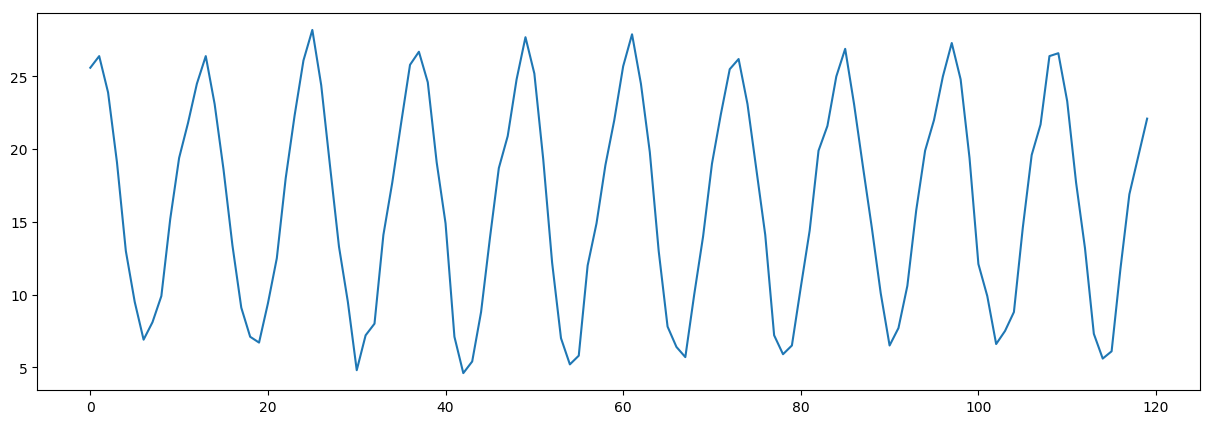

In [273]:
plt.figure(figsize=(15,5), dpi=100)
df['平均気温(℃)'].plot()

In [274]:
df['年月'] = pd.to_datetime(df['年月'])

In [275]:
average_temperature = pd.Series(df['平均気温(℃)'], dtype='float64')
average_temperature.index = df['年月']

In [276]:
average_temperature.head()

年月
2008-07-01    25.6
2008-08-01    26.4
2008-09-01    23.9
2008-10-01    19.1
2008-11-01    13.0
Name: 平均気温(℃), dtype: float64

In [277]:
average_temperature.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01'],
              dtype='datetime64[ns]', name='年月', length=121, freq=None)

In [278]:
average_temperature[0:20]

年月
2008-07-01    25.6
2008-08-01    26.4
2008-09-01    23.9
2008-10-01    19.1
2008-11-01    13.0
2008-12-01     9.5
2009-01-01     6.9
2009-02-01     8.1
2009-03-01     9.9
2009-04-01    15.2
2009-05-01    19.4
2009-06-01    21.8
2009-07-01    24.5
2009-08-01    26.4
2009-09-01    23.1
2009-10-01    18.6
2009-11-01    13.4
2009-12-01     9.1
2010-01-01     7.1
2010-02-01     6.7
Name: 平均気温(℃), dtype: float64

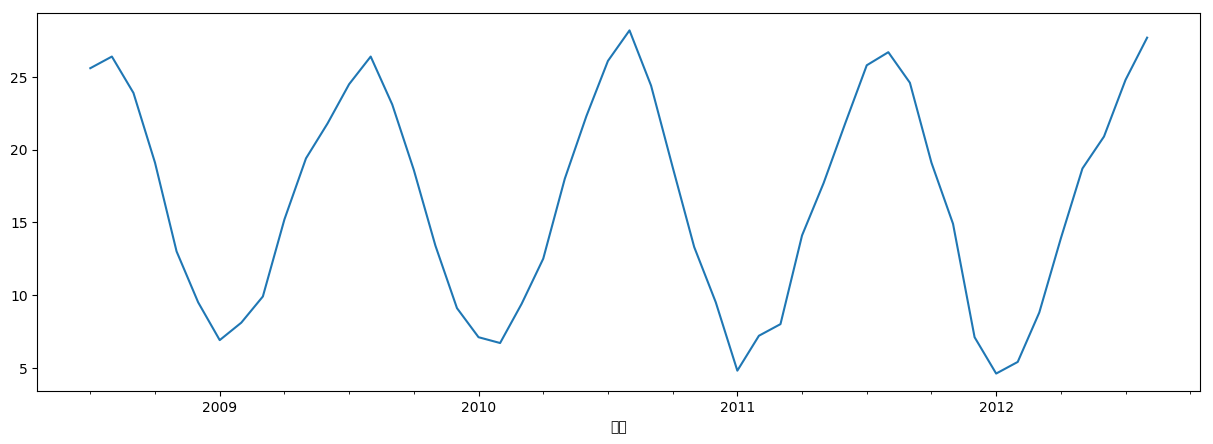

In [279]:
plt.figure(figsize=(15,5), dpi=100)
average_temperature[0:50].plot()

平均気温(℃)


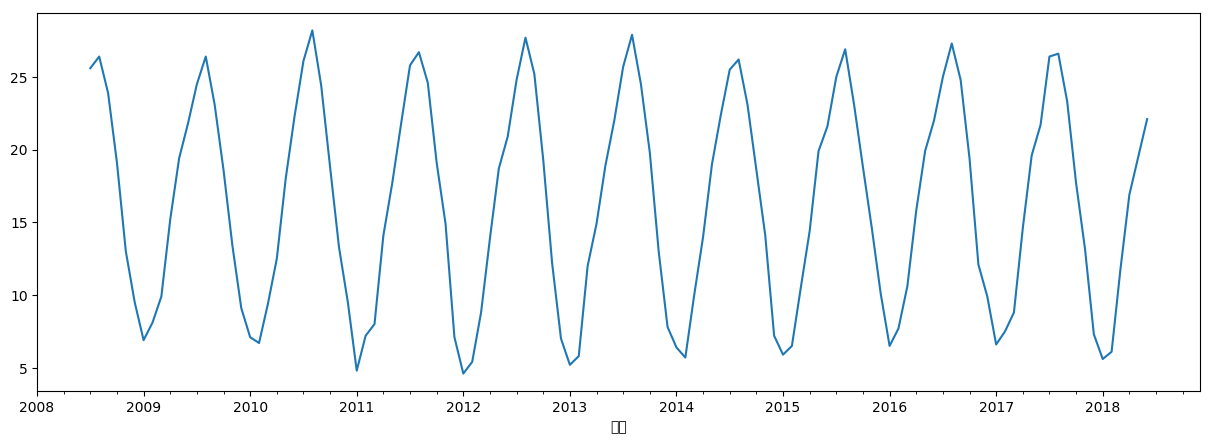

In [280]:
print(average_temperature.name)
plt.figure(figsize=(15,5), dpi=100)
average_temperature.plot()

In [281]:
# dtype が object だと相関が取れない
# total_precipitation = pd.Series(df['降水量の合計(mm)'], dtype='object')
total_precipitation = pd.Series(df['降水量の合計(mm)'], dtype='float64')
total_precipitation.index = df['年月']

In [282]:
total_precipitation.head()

年月
2008-07-01      8.5
2008-08-01    249.0
2008-09-01    234.5
2008-10-01    159.5
2008-11-01     63.0
Name: 降水量の合計(mm), dtype: float64

降水量の合計(mm)


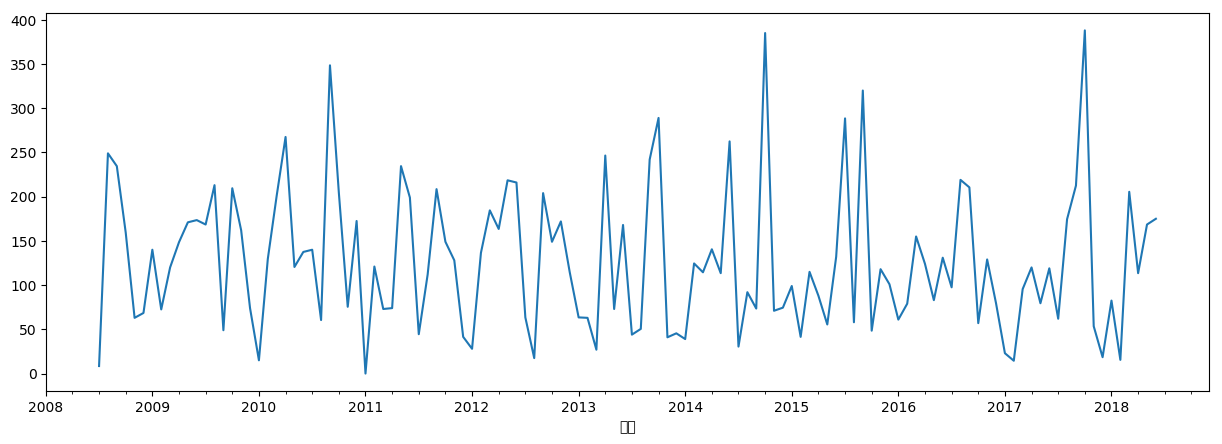

In [283]:
print(total_precipitation.name)
plt.figure(figsize=(15,5), dpi=100)
total_precipitation.plot()

In [284]:
ave_temp_tot_prec = pd.concat([average_temperature, total_precipitation], axis=1)

In [285]:
ave_temp_tot_prec.head()

,平均気温(℃),降水量の合計(mm)
年月,,
2008-07-01,25.6,8.5
2008-08-01,26.4,249.0
2008-09-01,23.9,234.5
2008-10-01,19.1,159.5
2008-11-01,13.0,63.0


In [286]:
type(ave_temp_tot_prec)

pandas.core.frame.DataFrame

In [287]:
ave_temp_tot_prec_corr = ave_temp_tot_prec.corr()

In [288]:
print(ave_temp_tot_prec_corr)

             平均気温(℃)  降水量の合計(mm)
平均気温(℃)     1.000000    0.325999
降水量の合計(mm)  0.325999    1.000000


In [289]:
df_corr = df.corr()
print(df_corr)
print(type(df_corr))

                 平均気温(℃)  降水量の合計(mm)  日照時間(時間)  平均風速(m/s)   最高気温(℃)   最低気温(℃)  \
平均気温(℃)         1.000000    0.325999  0.080673   0.281123  0.974568  0.981985   
降水量の合計(mm)      0.325999    1.000000 -0.387936   0.154108  0.333221  0.302573   
日照時間(時間)        0.080673   -0.387936  1.000000   0.232474  0.065673  0.053353   
平均風速(m/s)       0.281123    0.154108  0.232474   1.000000  0.282982  0.242488   
最高気温(℃)         0.974568    0.333221  0.065673   0.282982  1.000000  0.952901   
最低気温(℃)         0.981985    0.302573  0.053353   0.242488  0.952901  1.000000   
10分間降水量の最大(mm)  0.456776    0.646094 -0.026513   0.241680  0.466327  0.430779   
最大風速(m/s)       0.005271    0.247452 -0.180359   0.267956  0.034972 -0.023610   
最大瞬間風速(m/s)    -0.025709    0.319932 -0.186387   0.198167  0.001366 -0.055356   

                10分間降水量の最大(mm)  最大風速(m/s)  最大瞬間風速(m/s)  
平均気温(℃)               0.456776   0.005271    -0.025709  
降水量の合計(mm)            0.646094   0.247452     0.319932  
日照時間(時間)          

In [290]:
highest_temperature = pd.Series(df['最高気温(℃)'], dtype='float64')
highest_temperature.index = df['年月']

最高気温(℃)


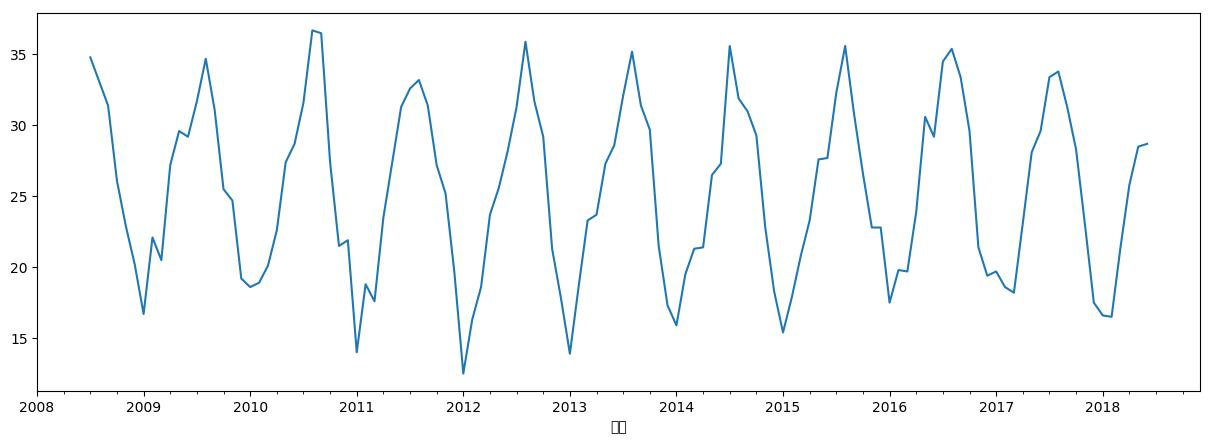

In [291]:
print(highest_temperature.name)
plt.figure(figsize=(15,5), dpi=100)
highest_temperature.plot()

In [292]:
lowest_Temperature = pd.Series(df['最低気温(℃)'], dtype='float64')
lowest_Temperature.index = df['年月']

最低気温(℃)


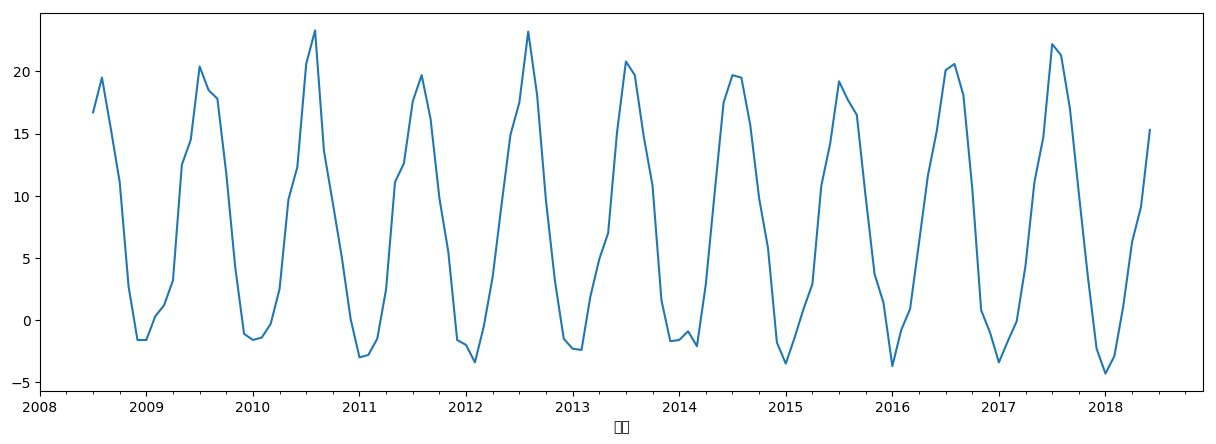

In [293]:
print(lowest_Temperature.name)
plt.figure(figsize=(15,5), dpi=100)
lowest_Temperature.plot()

In [294]:
ten_minutes_maximum_rainfall = pd.Series(df['10分間降水量の最大(mm)'], dtype='float64')
ten_minutes_maximum_rainfall.index = df['年月']

10分間降水量の最大(mm)


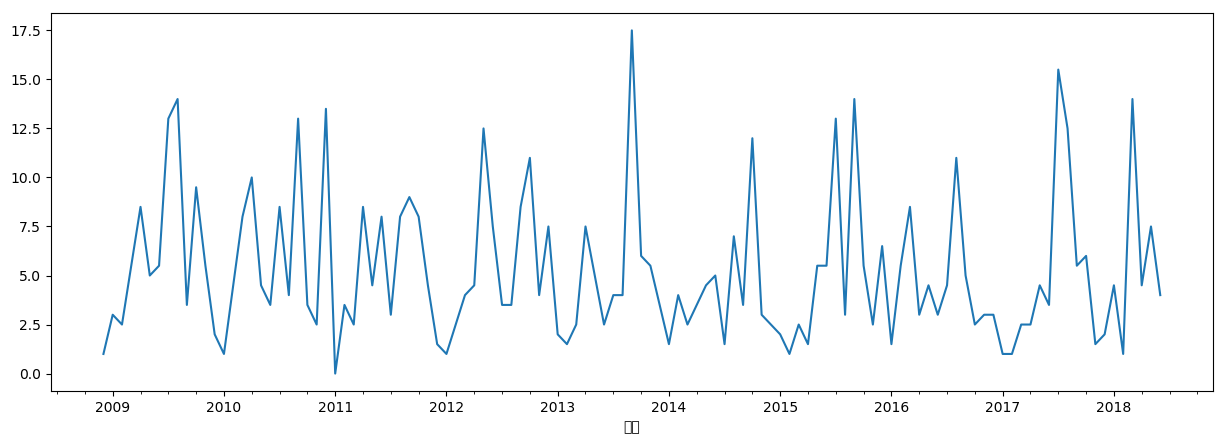

In [295]:
print(ten_minutes_maximum_rainfall.name)
plt.figure(figsize=(15,5), dpi=100)
ten_minutes_maximum_rainfall.plot()

In [296]:
average_temperature_a = pd.Series(df['平均気温(℃)'], dtype='float64').rename('A')

In [297]:
average_temperature_b = pd.Series(df['平均気温(℃)'], dtype='float64').rename('B')

In [298]:
ave_temp_ave_temp = pd.concat([average_temperature_a, average_temperature_b], axis=1)


In [299]:
ave_temp_ave_temp.head()

,A,B
0,25.6,25.6
1,26.4,26.4
2,23.9,23.9
3,19.1,19.1
4,13.0,13.0


In [300]:
type(ave_temp_ave_temp)

pandas.core.frame.DataFrame

In [301]:
ave_temp_ave_temp.corr()

,A,B
A,1.0,1.0
B,1.0,1.0


In [302]:
average_temperature_c = pd.Series(df['平均気温(℃)'][12:], dtype='float64').rename('C')

In [303]:
average_temperature_c.head()

12    24.5
13    26.4
14    23.1
15    18.6
16    13.4
Name: C, dtype: float64

In [304]:
average_temperature_c = average_temperature_c.reset_index()

In [305]:
average_temperature_c.head()

,index,C
0,12,24.5
1,13,26.4
2,14,23.1
3,15,18.6
4,16,13.4


In [306]:
type(average_temperature_c)

pandas.core.frame.DataFrame

In [307]:
a_c = pd.concat([average_temperature_a, average_temperature_c['C']], axis=1)

In [308]:
a_c.head()

,A,C
0,25.6,24.5
1,26.4,26.4
2,23.9,23.1
3,19.1,18.6
4,13.0,13.4


In [309]:
a_c.corr()

,A,C
A,1.000000,0.986555
C,0.986555,1.000000
